In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph

import tensorflow as tf
from tensorflow import keras

# PErceptron

In [4]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

# Build an image classifier using sequential API

In [85]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [86]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


Need to scale first because using gradient descent

In [87]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [88]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

#### Create model using sequential API

In [89]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28])) # Only does preprocessing
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [90]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [91]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_61 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_62 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
model.layers[1].name

'dense_3'

In [22]:
weights, biases = model.layers[1].get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


#### Compile Model

In [92]:
model.compile(loss="sparse_categorical_crossentropy", # because we have sparse labels here. Options are 
#               'categorical_crossentropy', 'sigmoid' (this one is for binary)
              optimizer="sgd",
              metrics=["accuracy"])

#### Train and Evaluate model

In [24]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7423 - accuracy: 0.7580 - val_loss: 0.5328 - val_accuracy: 0.8210
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4926 - accuracy: 0.8298 - val_loss: 0.4856 - val_accuracy: 0.8322
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4489 - accuracy: 0.8434 - val_loss: 0.4167 - val_accuracy: 0.8586
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4199 - accuracy: 0.8535 - val_loss: 0.4053 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4012 - accuracy: 0.8593 - val_loss: 0.3856 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3837 - accuracy: 0.8645 - val_loss: 0.3854 - val_accuracy: 0.8670
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3702 - accuracy: 0.8692 - val_loss: 0.3637 - val_accur

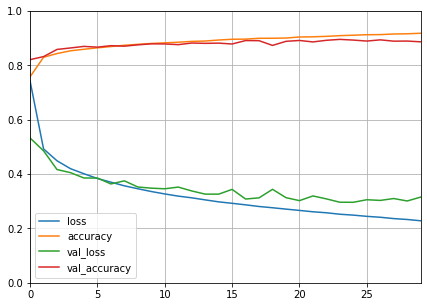

In [27]:
pd.DataFrame(history.history).plot(figsize=(7,5))
graph.grid(True)
graph.gca().set_ylim(0, 1)
graph.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 68.0997 - accuracy: 0.8439


[68.09970092773438, 0.8439000248908997]

### Using the model to make predictions

In [40]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba)

y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])
print(y_test[:3])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
[9 2 1]


### Build regression MLP using sequential API

In [42]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]), 
    keras.layers.Dense(1)])

model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data = (X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_test[:3], y_pred)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 60475098032766976.0000 - val_loss: 2743062528.0000
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 190922320.0000 - val_loss: 1175.2089
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 82.8653 - val_loss: 1.3829
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 1.3342 - val_loss: 1.3770
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 1.3344 - val_loss: 1.3773
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 1.3344 - val_loss: 1.3782
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 1.3343 - val_loss: 1.3786
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 1.3342 - val_loss: 1.3778
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 1.3345 - val_loss: 1.3789
Epoch 10/20
363/363 [==============================] - 1s 4ms/s

### Build complex models using Functional API
Many layers connect to output, not just the immediately preceeding layer

In [55]:
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [59]:
model.compile(loss = 'mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_test[:3], y_pred)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 1s 3

In [60]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [61]:
model.compile(loss="mse", optimizer="sgd")

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 1s 4

###### Model with auxiliary output
Each output needs own loss function here

In [72]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1)(concat)
aux_ouput = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs = [input_A, input_B], 
                           outputs = [output, aux_ouput])

model.compile(loss=['mse', 'mse'], loss_weights = [0.9, 0.1], optimizer='sgd')

In [65]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: nan - dense_40_loss: nan - dense_41_loss: nan - val_loss: nan - val_dense_40_loss: nan - val_dense_41_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: nan - dense_40_loss: nan - dense_41_loss: nan - val_loss: nan - val_dense_40_loss: nan - val_dense_41_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: nan - dense_40_loss: nan - dense_41_loss: nan - val_loss: nan - val_dense_40_loss: nan - val_dense_41_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: nan - dense_40_loss: nan - dense_41_loss: nan - val_loss: nan - val_dense_40_loss: nan - val_dense_41_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: nan - dense_40_loss: nan - dense_41_loss: nan - val_loss: nan - val_dense_40_loss: nan - val_dense_41_loss: nan
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - lo

In [66]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 3ms/step - loss: nan - dense_40_loss: nan - dense_41_loss: nan


### Build Dynamic Models using Subclassing API
- Can do for loops, if statements easily
- BUT cannot easily inspect, save, troubleshoot

In [67]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

### Save and Restore Model

In [73]:
model.save('my_keras_model.h5')

model = keras.models.load_model('my_keras_model.h5')

### Use callbacks
- Save checkpoints at regular intervals during training

In [76]:
# after building and compiling model

checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5')
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [77]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model

Epoch 1/10


TypeError: 'NoneType' object is not callable

In [78]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


TypeError: 'NoneType' object is not callable

## Visualization using TensorBoard

In [93]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

In [94]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [95]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[tensorboard_cb])

Epoch 1/30
   1/1719 [..............................] - ETA: 0s - loss: 2.4746 - accuracy: 0.0938WARNING:tensorflow:From /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7205 - accuracy: 0.7633 - val_loss: 0.5241 - val_accuracy: 0.8198
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4856 - accuracy: 0.8297 - val_loss: 0.4359 - val_accuracy: 0.8512
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4408 - accuracy: 0.8446 - val_loss: 0.5669 - val_accuracy: 0.7912
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4145 - accuracy: 0.8555 - val_loss: 0.3942 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [=====================

# Fine-Tuning Neural Netowrk Hyperparameters

In [96]:
# Example, can use grid search to find many hyper-parameters

def build_model(n_hidden = 1, n_neurons = 30, learning_rate = 3e-3, input_shape = [8]):
    model = keras.models.Sequential()
    options = {'input_shape': input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = 'relu', **options))
        otions = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss='mse', optimizer = optimizer)
    return model

In [97]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [98]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data = (X_valid, y_valid), 
              callbacks = [keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100


ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_6 is incompatible with the layer: expected axis -1 of input shape to have value 8 but received input with shape [None, 28, 28]


In [99]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [0, 1, 2, 3], 
    'n_neurons': np.arange(1, 100), 
    'learning_rate': reciprocal(3e-4, 3e-2)}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, 
                  validation_data=(X_valid, y_valid), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

Epoch 1/100


/home/arshad/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/arshad/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
   

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fc5c2dab250>, as the constructor either does not set or modifies parameter learning_rate

In [100]:
rnd_search_cv.best_params_

{'learning_rate': 0.001683454924600351, 'n_hidden': 0, 'n_neurons': 15}

In [101]:
model = rnd_search_cv.best_estimator_.model

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

## Libraries to optimize hyperparameters
- Hyperopt
- Hyperas, kopt, or Talos
- Scikit-optimize (skopt)
- Spearmint
- Sklearn-Deap

# Number Hidden Layers
- Lower hidden layers : model basic/low-level structures
- Higher hidden layers : Use the above inputs to go deeper
- Overall, it is faster
- Can reuse layers for other tasks = transfer learning
- Can try increasing number of layers until model overfits

# Number Neurons per Hidden Layer
- Determined by input and output
- All hidden layers can use same number of neurons
- Can try increasing number of neurons until model overfits
- Can pick model with more layers and neurons than we need, then use early stopping to prevent overfitting

# Learning Rate, Batch Size, Other Hyperparamters

### Learning Rate most important Hyperparamter
- Usually, optimal learning rate = Half max learning rate
- Choose better optimizer than SGD can be good
- Genrally, optimal batch size LESS THAN 32 AND GREATER THAN 10 (10 <= x < 32)
- Number of training iterations not matter, use early stopping instead